In [11]:
ATTR = 'SVS 1000'
ADV = 1
CLEAN = 0
RAND_STATE = 42

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from cuml import UMAP
import cudf

In [5]:
baseline_SVS = np.loadtxt(f'baseline {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')
adv_acg_SVS = np.loadtxt(f'adv acg {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')
clean_acg_SVS = np.loadtxt(f'clean acg {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')
adv_bb_SVS = np.loadtxt(f'adv bb {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')
clean_bb_SVS = np.loadtxt(f'clean bb {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')
rebaseline_SVS = np.loadtxt(f'rebaseline {ATTR}.csv',
                         delimiter=',',
                         ).astype('float32')

In [7]:
clean_arr = np.concatenate((baseline_SVS,rebaseline_SVS, clean_acg_SVS, clean_bb_SVS), axis=0)
adv_arr = np.concatenate((adv_acg_SVS,adv_acg_SVS), axis=0)

In [8]:
X = np.concatenate((clean_arr,adv_arr), axis=0)
Y = np.concatenate((np.zeros(clean_arr.shape[0]),np.ones(adv_arr.shape[0])), axis=0)

In [12]:
X_embed = UMAP(random_state=RAND_STATE).fit_transform(X)

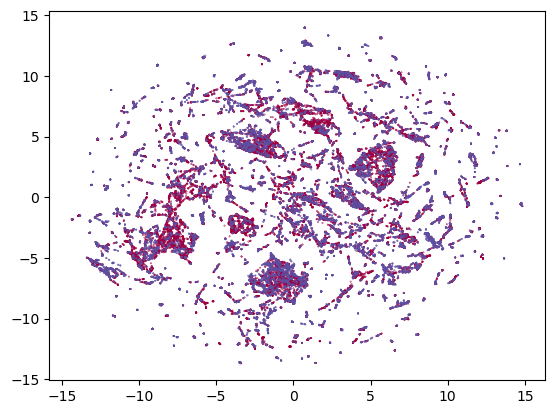

In [13]:
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=Y, s=0.1, cmap='Spectral')

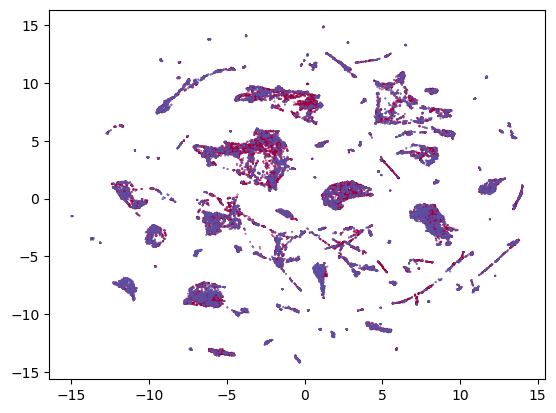

In [15]:
X_embed = UMAP(random_state=RAND_STATE,
               n_neighbors=30,
               ).fit_transform(X)
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=Y, s=0.1, cmap='Spectral')

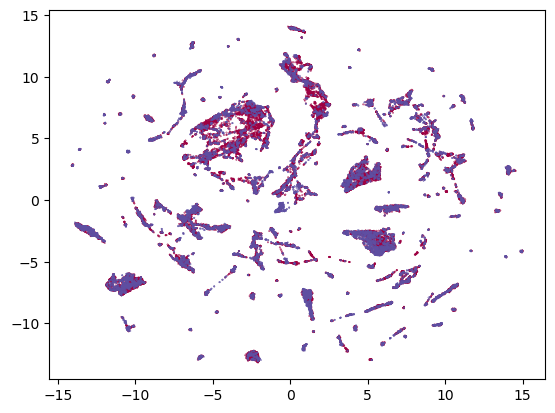

In [20]:
X_embed = UMAP(random_state=RAND_STATE,
               n_neighbors=30,
               min_dist=0,
               ).fit_transform(X)
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=Y, s=0.1, cmap='Spectral',)

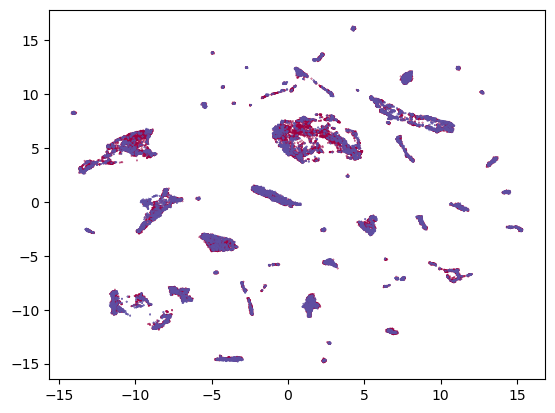

In [24]:
X_embed = UMAP(random_state=RAND_STATE,
               n_neighbors=60,
               min_dist=0,
               ).fit_transform(X)
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=Y, s=0.1, cmap='Spectral',)

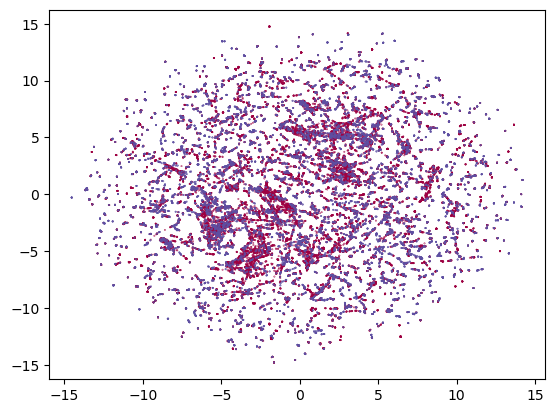

In [23]:
X_embed = UMAP(random_state=RAND_STATE,
               n_neighbors=10,
               #min_dist=0,
               ).fit_transform(X)
plt.scatter(X_embed[:, 0], X_embed[:, 1], c=Y, s=0.1, cmap='Spectral',)